In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [64]:
df_origin = pd.read_csv('./datasets/원본data.csv',index_col=0)

In [65]:
df=pd.read_csv('./datasets/원본data.csv',index_col=0)
df

,재고순환지표,경제심리지수,기계류내수출,건설수주액,수출입물가비율,코스피,장단기,외환보유액,뉴스심리지수,원달러,...,CD,유가,G20,미장단기,거래량,구리,천연가스,은,금,종가
Date,,,,,,,,,,,,,,,,,,,,,
2008-01,5.000000,112.100000,98.500000,10384.800000,105.100000,1853.700000,0.670000,261870733.000000,98.540000,936.800000,...,5.840000,26.816444,101.558900,1.030000,11548.000000,3.064000,7.850000,15.290000,860.000000,1000.000000
2008-02,3.900000,112.000000,98.400000,9246.100000,103.700000,1775.300000,0.530000,262364808.000000,97.880000,944.100000,...,5.460000,26.276930,101.286800,1.530000,13564.000000,3.273000,7.740000,16.916000,913.500000,897.970000
2008-03,3.200000,110.500000,98.400000,9434.400000,102.200000,1691.000000,0.310000,264245660.000000,88.120000,946.700000,...,5.170000,26.771666,100.974300,1.930000,9948.000000,3.928500,9.346000,20.180000,984.200000,873.820000
2008-04,0.400000,109.400000,98.900000,10121.700000,100.700000,1705.800000,0.140000,260482546.000000,103.730000,983.500000,...,5.390000,27.311699,100.601400,1.770000,13964.000000,3.806500,9.724000,16.935000,887.800000,965.780000
2008-05,-1.600000,106.100000,98.500000,9955.600000,98.600000,1758.200000,0.220000,258198958.000000,93.060000,1009.100000,...,5.360000,25.481760,100.145200,1.410000,16690.000000,3.694500,10.561000,16.205000,850.900000,1056.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12,-10.400000,92.700000,115.400000,10568.500000,85.200000,2336.400000,0.840000,423163664.000000,83.390000,1304.210000,...,4.030000,76.773430,98.935240,-0.720000,8411.000000,3.817500,6.738000,22.841000,1815.200000,1435.740000
2023-01,-15.400000,90.900000,111.200000,13969.700000,85.100000,2380.400000,0.450000,429967671.000000,93.790000,1269.020000,...,3.980000,78.254589,98.971380,-0.610000,10487.000000,3.795250,4.273500,24.328000,1835.800000,1343.910000
2023-02,-16.200000,91.100000,106.900000,14725.600000,84.600000,2391.300000,0.180000,425286150.000000,97.480000,1221.780000,...,3.590000,74.513809,99.024580,-0.700000,9732.000000,4.111000,2.468000,23.609000,1927.800000,1439.490000


In [66]:
## 경제심리지수, 기계류내수출, 장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스, 수출입내물가비율--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

## 변동성이 큰 것들 ->log씌운다
df['재고순환지표']+=24.9
df['재고순환지표']=np.log1p(df['재고순환지표'])
df['거래량']=np.log1p(df['거래량'])

df['원엔']=df['원엔'].diff(1)
df['구리']=df['구리'].diff(1)
df['원위안']=df['원위안'].diff(1)
df['금']=df['금'].diff(1)
df['은']=df['은'].diff(1)
df['코스피']=df['코스피'].diff(1)
df['건설수주액']=df['건설수주액'].diff(1)
df['CD']=df['CD'].diff(1)
df['유가']=df['유가'].diff(1)
df['미장단기']=df['미장단기'].diff(1)
df['외환보유액']=df['외환보유액'].diff(1)

df['종가']=df['종가'].pct_change()
df=df.dropna(axis=0)


In [67]:
df.drop(['유가','은','원위안'],axis=1,inplace=True)

In [68]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가'],
      dtype='object')

In [69]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터프레임으로부터 독립변수들을 선택하여 X에 저장
X = df[['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가']]

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)

    Feature   VIF Factor
0     const 19906.233237
1    재고순환지표     2.455826
2    경제심리지수     4.473925
3    기계류내수출     1.805867
4     건설수주액     1.080837
5   수출입물가비율     1.661240
6       코스피     2.757239
7       장단기     4.162331
8     외환보유액     1.580343
9    뉴스심리지수     3.833064
10      원달러     2.789008
11       원엔     1.659306
12       CD     1.759922
13      G20     3.994889
14     미장단기     1.322916
15      거래량     2.153061
16       구리     1.722130
17     천연가스     2.091600
18        금     1.360706
19       종가     1.604271


In [70]:
### H0가 비정상(non-stationary)이다
### 유의수준보다 p-value가 작으면 기각 --> 정상적 데이터다

from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표,-4.223353,0.000601,4.000000,178.000000,-2.877918
경제심리지수,-3.325043,0.013795,11.000000,171.000000,-2.878595
기계류내수출,-3.823751,0.002673,11.000000,171.000000,-2.878595
건설수주액,-3.362024,0.012324,12.000000,170.000000,-2.878696
수출입물가비율,-3.070182,0.028840,13.000000,169.000000,-2.878799
코스피,-4.309950,0.000427,14.000000,168.000000,-2.878903
장단기,-3.516219,0.007580,13.000000,169.000000,-2.878799
외환보유액,-5.573405,0.000001,10.000000,172.000000,-2.878495
뉴스심리지수,-5.616294,0.000001,12.000000,170.000000,-2.878696
원달러,-3.601805,0.005727,0.000000,182.000000,-2.877555


In [71]:
from statsmodels.tsa.stattools import grangercausalitytests
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

#df.replace(',', '', regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce') # numeric 변환
maxlag= 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose:print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            min_p_value_index = np.argmin(p_values)
            df.loc[r, c] = min_p_value
            print(r,c)
            print(f'Minimum P-value Index: {min_p_value_index} (Lag: {min_p_value_index + 1})')
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
df_granger=grangers_causation_matrix(df, variables = df.columns)
#df.to_csv('granger검정.csv')
df_granger

재고순환지표 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
경제심리지수 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
기계류내수출 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
건설수주액 재고순환지표
Minimum P-value Index: 1 (Lag: 2)
수출입물가비율 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
코스피 재고순환지표
Minimum P-value Index: 3 (Lag: 4)
장단기 재고순환지표
Minimum P-value Index: 4 (Lag: 5)
외환보유액 재고순환지표
Minimum P-value Index: 3 (Lag: 4)
뉴스심리지수 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
원달러 재고순환지표
Minimum P-value Index: 1 (Lag: 2)
원엔 재고순환지표
Minimum P-value Index: 2 (Lag: 3)
CD 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
G20 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
미장단기 재고순환지표
Minimum P-value Index: 3 (Lag: 4)
거래량 재고순환지표
Minimum P-value Index: 2 (Lag: 3)
구리 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
천연가스 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
금 재고순환지표
Minimum P-value Index: 0 (Lag: 1)
종가 재고순환지표
Minimum P-value Index: 2 (Lag: 3)
재고순환지표 경제심리지수
Minimum P-value Index: 2 (Lag: 3)
경제심리지수 경제심리지수
Minimum P-value Index: 0 (Lag: 1)
기계류내수출 경제심리지수
Minimum P-value Ind

,재고순환지표_x,경제심리지수_x,기계류내수출_x,건설수주액_x,수출입물가비율_x,코스피_x,장단기_x,외환보유액_x,뉴스심리지수_x,원달러_x,원엔_x,CD_x,G20_x,미장단기_x,거래량_x,구리_x,천연가스_x,금_x,종가_x
재고순환지표_y,1.000000,0.000000,0.039700,0.128200,0.000200,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.014200,0.000000,0.000500,0.000000,0.000000,0.142300,0.000100
경제심리지수_y,0.000000,1.000000,0.186400,0.065400,0.000300,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.029000,0.000000,0.125400,0.000100,0.000000,0.002500,0.062300,0.000000
기계류내수출_y,0.000000,0.001000,1.000000,0.323400,0.016300,0.021200,0.001300,0.146900,0.000000,0.097500,0.004900,0.005700,0.007900,0.046600,0.456700,0.033800,0.088700,0.143500,0.000300
건설수주액_y,0.227000,0.121400,0.033900,1.000000,0.246800,0.335400,0.007200,0.018800,0.333500,0.195600,0.413200,0.349300,0.065400,0.239200,0.584000,0.578000,0.013600,0.046800,0.341900
수출입물가비율_y,0.008900,0.000000,0.015100,0.105000,1.000000,0.000000,0.000000,0.000000,0.000000,0.008900,0.002600,0.050900,0.000000,0.163100,0.371600,0.000000,0.069000,0.096100,0.000000
코스피_y,0.069200,0.000200,0.201600,0.105600,0.000000,1.000000,0.004700,0.000000,0.000000,0.002100,0.194300,0.086500,0.000000,0.028200,0.209400,0.132900,0.021400,0.453800,0.000300
장단기_y,0.000000,0.000000,0.000000,0.000700,0.000000,0.030600,1.000000,0.007100,0.088900,0.002200,0.001100,0.000000,0.000000,0.000000,0.000200,0.293700,0.005500,0.126400,0.008900
외환보유액_y,0.032300,0.023600,0.264400,0.188200,0.000800,0.001500,0.000700,1.000000,0.001400,0.000000,0.220100,0.021800,0.001400,0.009300,0.013100,0.019300,0.000000,0.160000,0.128200
뉴스심리지수_y,0.076800,0.029500,0.450700,0.278200,0.000400,0.226900,0.072000,0.013300,1.000000,0.024700,0.794400,0.059000,0.001100,0.255900,0.015400,0.033500,0.002300,0.015300,0.793300
원달러_y,0.000000,0.007200,0.191400,0.251300,0.095100,0.000000,0.000000,0.000000,0.000000,1.000000,0.014900,0.000000,0.003200,0.024000,0.162300,0.000700,0.000000,0.672100,0.004700


In [72]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가'],
      dtype='object')

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
train = pd.DataFrame(train_data)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
test = pd.DataFrame(test_data)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VAR model
    model_var = VAR(endog=train)
    model_fit = model_var.fit(maxlags=6, ic='aic',method='burg-rew')

    # One step forecast
    forecast = model_fit.forecast(train.values[-6:], steps=1)

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)



In [74]:
pred['date']= test.index
pred=pred.set_index('date')

In [75]:
pred

,재고순환지표,경제심리지수,수출입물가비율,코스피,장단기,원달러,CD,G20,미장단기,거래량,구리,종가
date,,,,,,,,,,,,
2020-05,-6.900229,43.866783,124.508856,-327.467180,-1.711725,688.180918,16.098407,81.411667,5.917038,16.731752,6.170733,2.703027
2020-06,0.857497,51.178278,96.027804,-1589.425132,0.085610,666.150780,-4.207874,76.273655,-3.934040,3.155250,-10.767823,-1.005843
2020-07,-0.704589,77.725202,92.920826,288.160012,-0.045510,1660.860003,-1.025718,99.191930,-0.587578,13.328943,-2.729225,0.480587
2020-08,2.255276,59.933028,99.809917,-364.548071,0.964351,1399.443520,-0.205419,99.764156,-0.055844,9.929908,-0.930643,-0.320584
2020-09,2.846180,67.834971,103.054215,-222.254756,0.411709,1429.113705,-0.352120,77.782720,-0.374567,12.004954,-0.747134,-0.367298
2020-10,3.834347,85.112723,98.829656,216.392021,1.166470,1087.853302,-1.287936,101.557318,1.362187,9.405214,1.336469,0.008880
2020-11,3.609209,89.452045,95.474600,-6.282373,0.627055,1155.722589,0.028476,100.520006,-0.261749,10.270274,-0.191401,-0.112767
2020-12,3.738385,90.965722,95.660653,33.300315,0.929125,1085.342015,-0.332309,100.603874,0.245210,9.112431,0.555902,-0.014496
2021-01,3.382492,93.648702,94.267308,159.694733,0.964345,961.786878,0.018265,102.604631,0.260191,9.701692,0.321872,0.101623


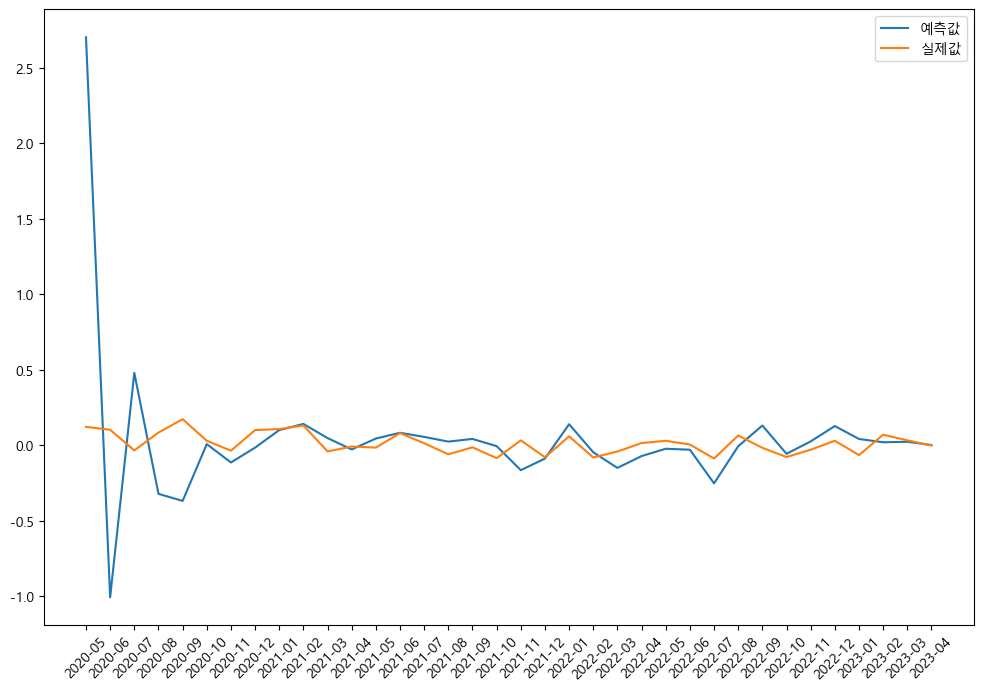

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(pred.index, pred['종가'],label='예측값')
plt.plot(test.index, test['종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [77]:
show=pd.concat([pred['종가'],test['종가']], axis=1, keys=['예측', '실제'])
show

,예측,실제
2020-05,2.703027,0.123224
2020-06,-1.005843,0.103702
2020-07,0.480587,-0.033026
2020-08,-0.320584,0.085184
2020-09,-0.367298,0.174103
2020-10,0.008880,0.031017
2020-11,-0.112767,-0.034550
2020-12,-0.014496,0.101705
2021-01,0.101623,0.108382
2021-02,0.142488,0.132421


In [78]:
a=df_origin[148:][['종가']]
a

,종가
Date,
2020-05,1047.710000
2020-06,1156.360000
2020-07,1118.170000
2020-08,1213.420000
2020-09,1424.680000
2020-10,1468.870000
2020-11,1418.120000
2020-12,1562.350000
2021-01,1731.680000


In [79]:
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
show

,예측,실제,실제종가
2020-05,2.703027,0.123224,1047.710000
2020-06,-1.005843,0.103702,1156.360000
2020-07,0.480587,-0.033026,1118.170000
2020-08,-0.320584,0.085184,1213.420000
2020-09,-0.367298,0.174103,1424.680000
2020-10,0.008880,0.031017,1468.870000
2020-11,-0.112767,-0.034550,1418.120000
2020-12,-0.014496,0.101705,1562.350000
2021-01,0.101623,0.108382,1731.680000
2021-02,0.142488,0.132421,1960.990000


In [80]:
b=df_origin[147:]['종가'] * np.exp(show['예측'])
b=b.dropna()

In [81]:
show=pd.concat([show,b],axis=1)
show

,예측,실제,실제종가,0
2020-05,2.703027,0.123224,1047.710000,15636.901427
2020-06,-1.005843,0.103702,1156.360000,422.922670
2020-07,0.480587,-0.033026,1118.170000,1808.107843
2020-08,-0.320584,0.085184,1213.420000,880.609640
2020-09,-0.367298,0.174103,1424.680000,986.738251
2020-10,0.008880,0.031017,1468.870000,1481.970971
2020-11,-0.112767,-0.034550,1418.120000,1266.889365
2020-12,-0.014496,0.101705,1562.350000,1539.865106
2021-01,0.101623,0.108382,1731.680000,1916.910152
2021-02,0.142488,0.132421,1960.990000,2261.295253


In [82]:
show.rename(columns={0 : '예측종가'},inplace=True)

In [84]:
show

,예측,실제,실제종가,예측종가
2020-05,2.703027,0.123224,1047.710000,15636.901427
2020-06,-1.005843,0.103702,1156.360000,422.922670
2020-07,0.480587,-0.033026,1118.170000,1808.107843
2020-08,-0.320584,0.085184,1213.420000,880.609640
2020-09,-0.367298,0.174103,1424.680000,986.738251
2020-10,0.008880,0.031017,1468.870000,1481.970971
2020-11,-0.112767,-0.034550,1418.120000,1266.889365
2020-12,-0.014496,0.101705,1562.350000,1539.865106
2021-01,0.101623,0.108382,1731.680000,1916.910152
2021-02,0.142488,0.132421,1960.990000,2261.295253


In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 562.584395
MSE: 5967053.559760
RMSE: 2442.755321
